##### <center><b>Visualizing and analyzing data</b><center>
#### <b>Importing the libraries<b>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
import xgboost as xgb
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix
import warnings
import pickle

#### <b>Read the Dataset<b>

In [3]:
df = pd.read_csv(r"C:\Online Payments Fraud Detection\data\PS_20174392719_1491204439457_log.csv")

In [7]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [11]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [8]:
df.drop(['isFlaggedFraud'], axis = 1, inplace =True)

In [9]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1


In [14]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [15]:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1


In [16]:
plt.style.use('ggplot')
warnings.filterwarnings('ignore')

In [17]:
df.corr(numeric_only=True)

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000


#### <b>Heatmap</b>

<Axes: >

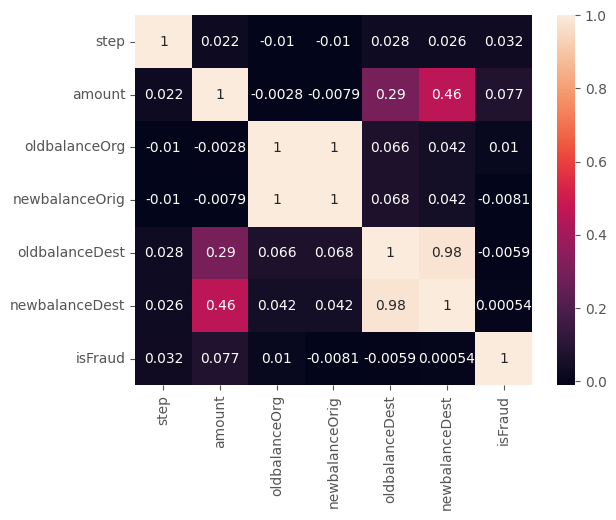

In [18]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

#### <b>Univariate analysis</b>

<Axes: xlabel='step', ylabel='Count'>

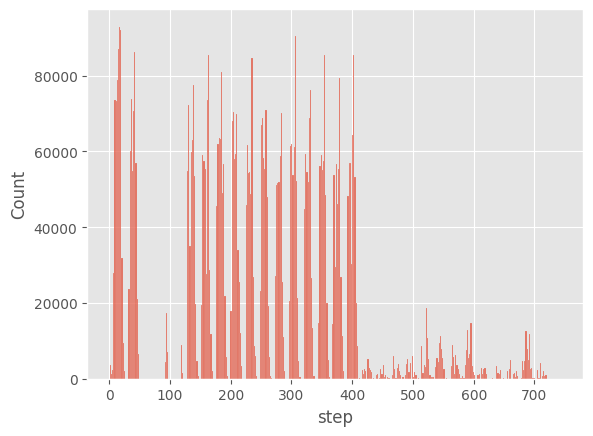

In [19]:
sns.histplot(data=df, x='step')

<Axes: xlabel='step'>

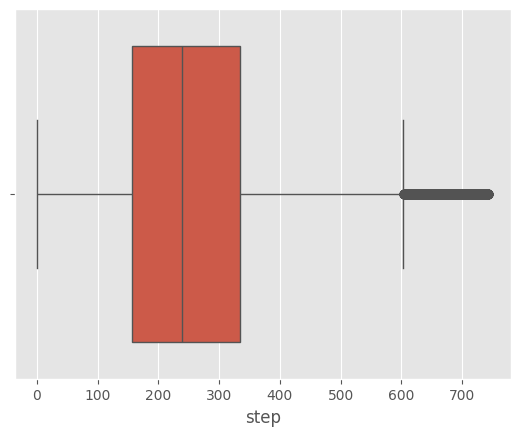

In [20]:
sns.boxplot(data=df, x='step')

<Axes: xlabel='type', ylabel='count'>

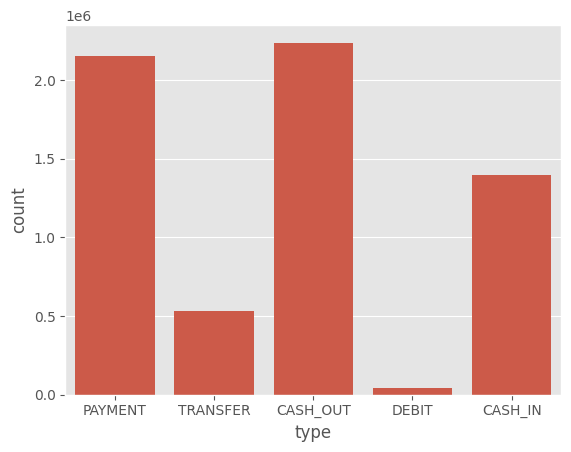

In [21]:
sns.countplot(data=df, x='type')

<Axes: xlabel='amount', ylabel='Count'>

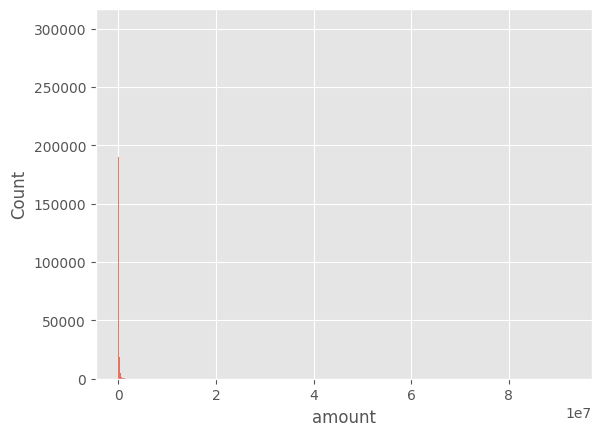

In [22]:
sns.histplot(data = df, x = 'amount')

<Axes: xlabel='amount'>

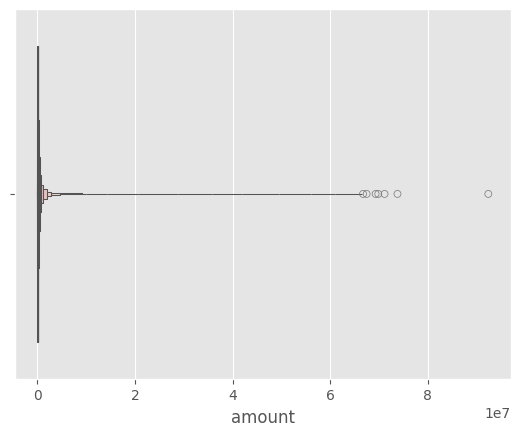

In [23]:
sns.boxenplot(data = df, x = 'amount')

<Axes: xlabel='oldbalanceOrg', ylabel='Count'>

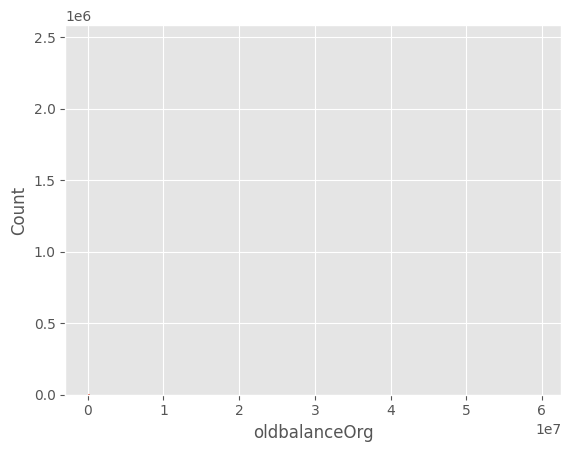

In [24]:
sns.histplot(data = df, x = 'oldbalanceOrg')

In [25]:
df['nameDest'].value_counts()

nameDest
C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
              ... 
C1049862186      1
C2118381511      1
C2099952089      1
C1027984317      1
C1251365829      1
Name: count, Length: 2722362, dtype: int64

<Axes: xlabel='oldbalanceDest'>

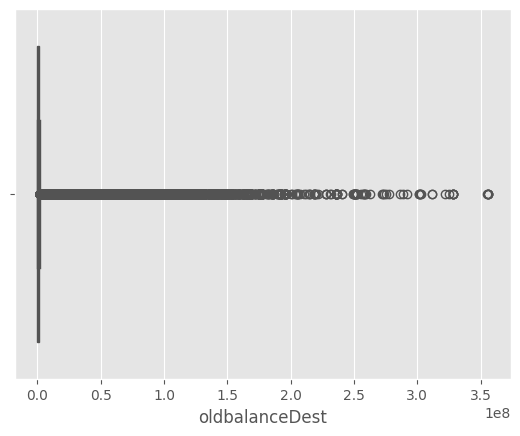

In [26]:
sns.boxplot(data = df, x = 'oldbalanceDest')

<Axes: xlabel='newbalanceDest'>

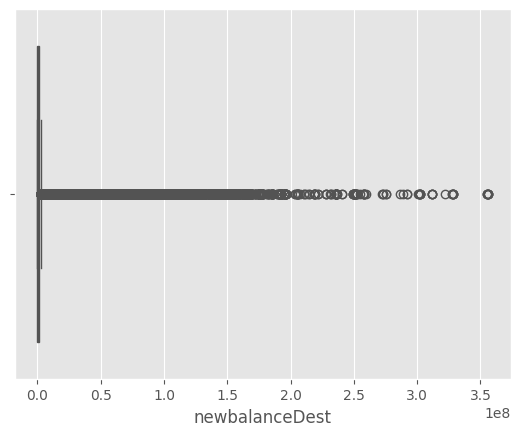

In [27]:
sns.boxplot(data = df, x = 'newbalanceDest')

<Axes: xlabel='isFraud', ylabel='count'>

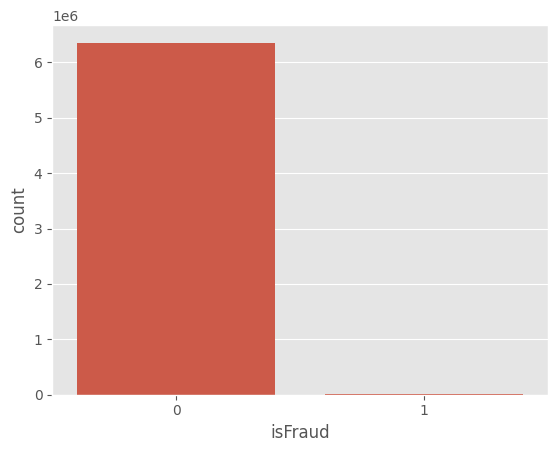

In [28]:
sns.countplot(data = df, x = 'isFraud')

In [29]:
df['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [30]:
df.loc[df['isFraud']==0, 'isFraud'] = 'is not Fraud'
df.loc[df['isFraud']==1, 'isFraud'] = 'is Fraud'

In [31]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,is not Fraud
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,is not Fraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,is Fraud
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,is Fraud
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,is not Fraud
...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,is Fraud
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,is Fraud
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,is Fraud
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,is Fraud


#### <b>Bivariate analysis</b>

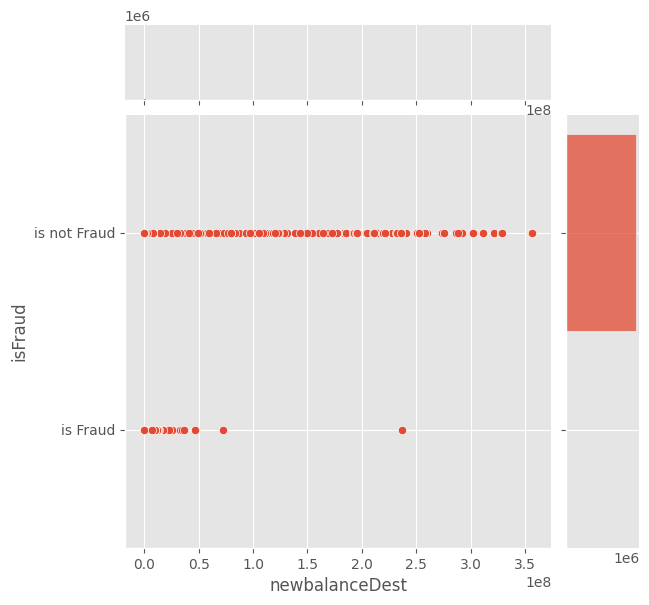

In [32]:
sns.jointplot(data = df, x = 'newbalanceDest', y = 'isFraud')

<Axes: xlabel='type', ylabel='count'>

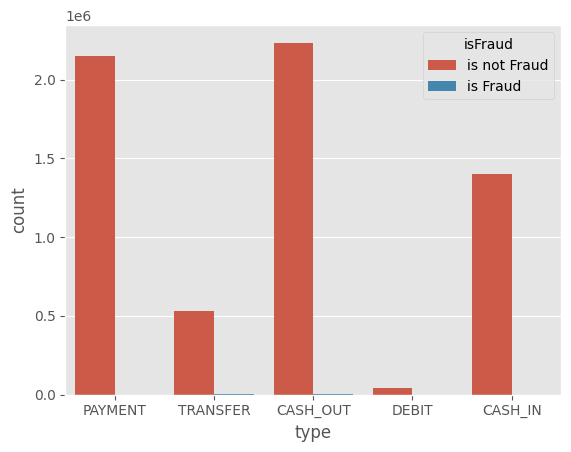

In [64]:
sns.countplot(data = df, x = 'type', hue = 'isFraud')

<Axes: xlabel='isFraud', ylabel='step'>

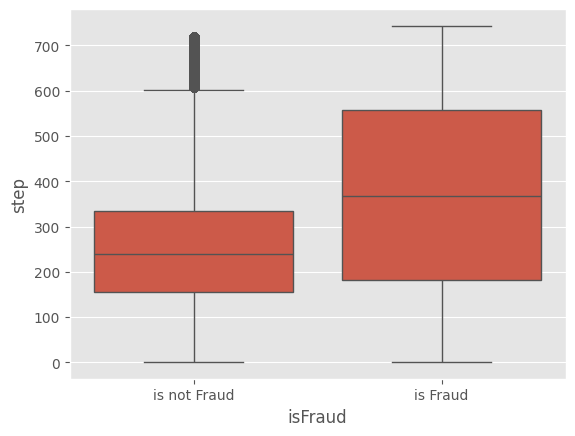

In [65]:
sns.boxplot(data = df, x = 'isFraud', y = 'step')

<Axes: xlabel='isFraud', ylabel='amount'>

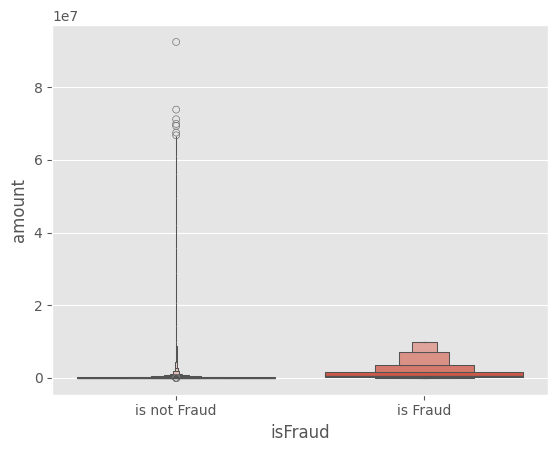

In [66]:
sns.boxenplot(data = df, x = 'isFraud', y = 'amount')

<Axes: xlabel='isFraud', ylabel='oldbalanceOrg'>

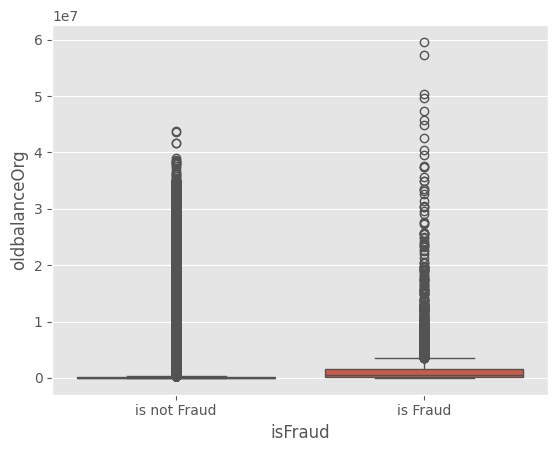

In [67]:
sns.boxplot(data = df, x = 'isFraud', y = 'oldbalanceOrg')

<Axes: xlabel='isFraud', ylabel='newbalanceOrig'>

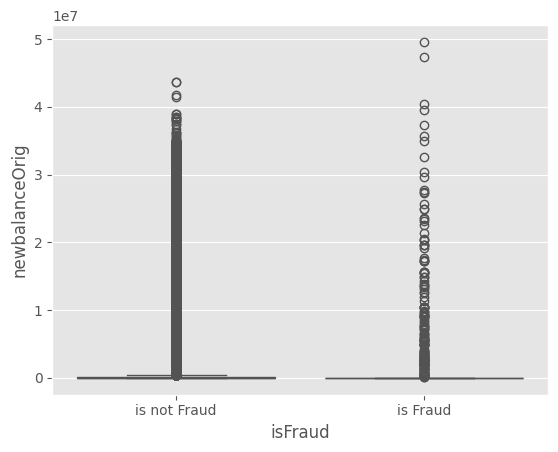

In [68]:
sns.boxplot(data = df, x = 'isFraud', y = 'newbalanceOrig')

<Axes: xlabel='isFraud', ylabel='oldbalanceDest'>

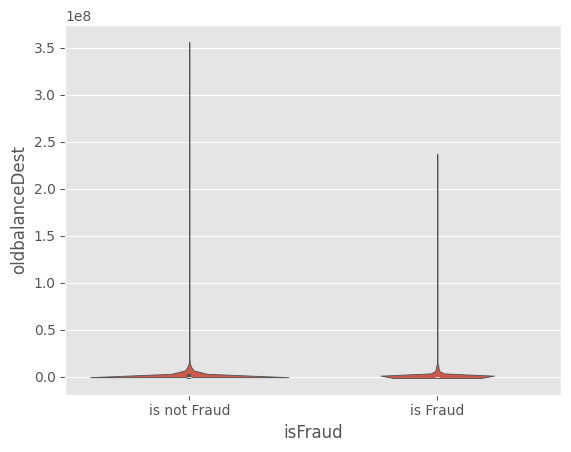

In [69]:
sns.violinplot(data = df, x = 'isFraud', y = 'oldbalanceDest')

<Axes: xlabel='isFraud', ylabel='newbalanceDest'>

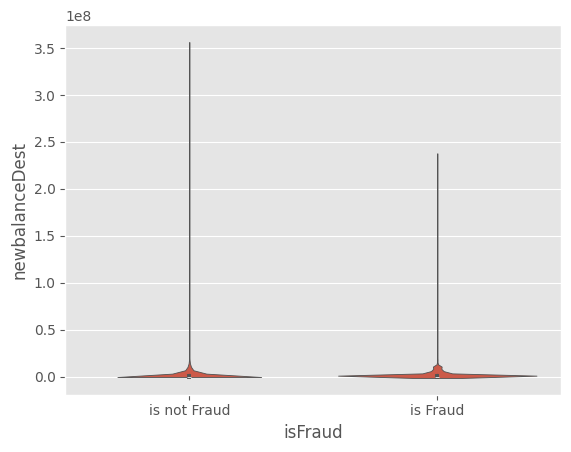

In [70]:
sns.violinplot(data = df, x = 'isFraud', y = 'newbalanceDest')

#### <b>Descriptive analysis</b>

In [10]:
df.describe(include='all')

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
count,6.362620e+06,6362620,6.362620e+06,6362620,6.362620e+06,6.362620e+06,6362620,6.362620e+06,6.362620e+06,6.362620e+06
unique,NaN,5,NaN,6353307,NaN,NaN,2722362,NaN,NaN,NaN
top,NaN,CASH_OUT,NaN,C1902386530,NaN,NaN,C1286084959,NaN,NaN,NaN
freq,NaN,2237500,NaN,3,NaN,NaN,113,NaN,NaN,NaN
mean,2.433972e+02,NaN,1.798619e+05,NaN,8.338831e+05,8.551137e+05,NaN,1.100702e+06,1.224996e+06,1.290820e-03
std,1.423320e+02,NaN,6.038582e+05,NaN,2.888243e+06,2.924049e+06,NaN,3.399180e+06,3.674129e+06,3.590480e-02
min,1.000000e+00,NaN,0.000000e+00,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,NaN,1.338957e+04,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,NaN,7.487194e+04,NaN,1.420800e+04,0.000000e+00,NaN,1.327057e+05,2.146614e+05,0.000000e+00
75%,3.350000e+02,NaN,2.087215e+05,NaN,1.073152e+05,1.442584e+05,NaN,9.430367e+05,1.111909e+06,0.000000e+00


#### <center><b>Data Pre-processing</b></center>

In [11]:
df.shape

(6362620, 10)

In [12]:
df.drop(['nameOrig', 'nameDest'], axis = 1, inplace = True)

In [13]:
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0


#### <b>Checking for null values</b>

In [37]:
df.isnull().sum()

step              0
type              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   oldbalanceOrg   float64
 4   newbalanceOrig  float64
 5   oldbalanceDest  float64
 6   newbalanceDest  float64
 7   isFraud         object 
dtypes: float64(5), int64(1), object(2)
memory usage: 388.3+ MB


#### <b>Handling outliers</b>

<Axes: ylabel='amount'>

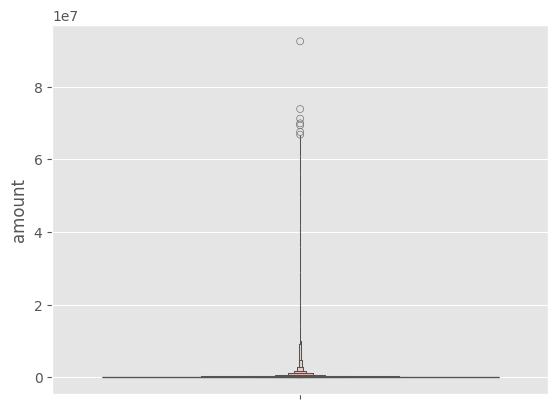

In [39]:
sns.boxenplot(df['amount'])

#### <b>Remove the outliers</b>

In [ ]:
print(stats.mode(df['amount']))
print(np.mean(df['amount']))

ModeResult(mode=np.float64(10000000.0), count=np.int64(3207))
179861.90354913071


In [41]:
q1 = np.quantile(df['amount'], 0.25)
q3 = np.quantile(df['amount'], 0.75)

IQR = q3 - q1

uppaer_bound = q3+(1.5*IQR)
lower_bound = q1-(1.5*IQR)

print('q1 : ', q1)
print('q3 : ', q3)
print('IQR : ', IQR)
print('Upper Bound : ', uppaer_bound)
print('Lower Bound : ', lower_bound)
print('Skewed Data : ', len(df[df['amount'] > uppaer_bound]))
print('Skewed Data : '), len(df[df['amount'] < lower_bound])

q1 :  13389.57
q3 :  208721.4775
IQR :  195331.9075
Upper Bound :  501719.33875
Lower Bound :  -279608.29125
Skewed Data :  338078
Skewed Data : 


(None, 0)

In [42]:
def transformtionplot(feature):
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    sns.distplot(feature)
    plt.subplot(1,2,2)
    stats.probplot(feature, plot = plt)

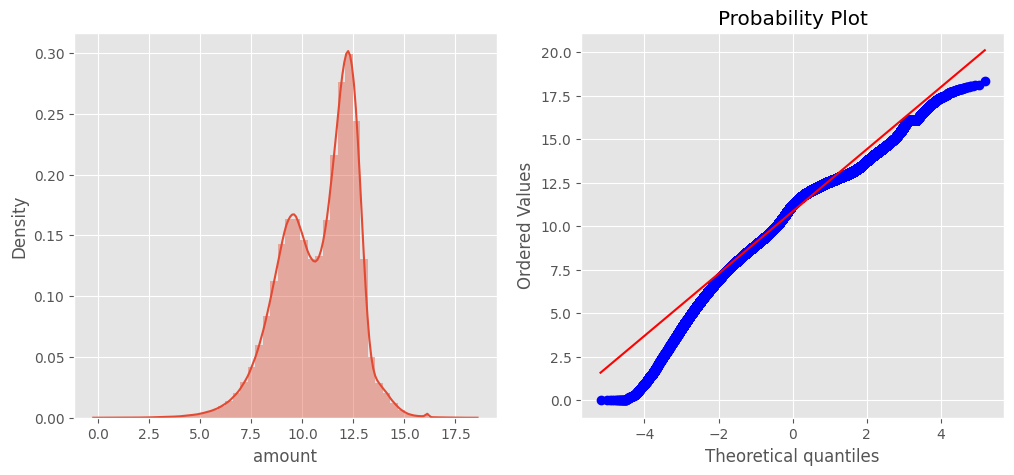

In [43]:
transformtionplot(np.log1p(df['amount']))

In [44]:
df['amount'] = np.log1p(df['amount'])

#### <b>Object data labelencoding</b>

In [ ]:
la = LabelEncoder()
df['type'] = la.fit_transform(df['type'])

df['type'].value_counts()

type
1    2237500
3    2151495
0    1399284
4     532909
2      41432
Name: count, dtype: int64

#### <b>Dividing the dataset into dependent and independent y and x respectively</b>

In [14]:
x = df.drop('isFraud', axis = 1)
y = df['isFraud']

In [15]:
x

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,1,PAYMENT,9839.64,170136.00,160296.36,0.00,0.00
1,1,PAYMENT,1864.28,21249.00,19384.72,0.00,0.00
2,1,TRANSFER,181.00,181.00,0.00,0.00,0.00
3,1,CASH_OUT,181.00,181.00,0.00,21182.00,0.00
4,1,PAYMENT,11668.14,41554.00,29885.86,0.00,0.00
...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,339682.13,0.00,0.00,339682.13
6362616,743,TRANSFER,6311409.28,6311409.28,0.00,0.00,0.00
6362617,743,CASH_OUT,6311409.28,6311409.28,0.00,68488.84,6379898.11
6362618,743,TRANSFER,850002.52,850002.52,0.00,0.00,0.00


In [16]:
y

0          0
1          0
2          1
3          1
4          0
          ..
6362615    1
6362616    1
6362617    1
6362618    1
6362619    1
Name: isFraud, Length: 6362620, dtype: int64

#### <center><b>Splitting data into train and test</b></center>

#### Train & Test split

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state= 0 , test_size = 0.2)

In [18]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5090096, 7)
(1272524, 7)
(5090096,)
(1272524,)


#### <center><b>Model Building</b></center>

#### <b>Random Forest classifier</b>

In [51]:
rfc = RandomForestClassifier()

In [52]:
rfc.fit(x_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [53]:
y_test_predict1 = rfc.predict(x_test)
test_accuracy = accuracy_score(y_test, y_test_predict1)
test_accuracy

0.9997123826348265

In [54]:
y_train_predict1 = rfc.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_predict1)
train_accuracy

0.9999998035400511

In [55]:
pd.crosstab(y_test, y_test_predict1)

col_0,is Fraud,is not Fraud
isFraud,,
is Fraud,1301,340
is not Fraud,26,1270857


In [56]:
print(classification_report(y_test, y_test_predict1))

              precision    recall  f1-score   support

    is Fraud       0.98      0.79      0.88      1641
is not Fraud       1.00      1.00      1.00   1270883

    accuracy                           1.00   1272524
   macro avg       0.99      0.90      0.94   1272524
weighted avg       1.00      1.00      1.00   1272524



#### <b>Decision tree Classifier</b>

In [57]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

y_test_predict2 = dtc.predict(x_test)
test_accuracy = accuracy_score(y_test, y_test_predict2)
test_accuracy

0.9997021667174844

In [58]:
y_train_predict2 = dtc.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_predict2)
train_accuracy

1.0

In [59]:
pd.crosstab(y_test, y_test_predict2)

col_0,is Fraud,is not Fraud
isFraud,,
is Fraud,1439,202
is not Fraud,177,1270706


In [60]:
print(classification_report(y_test, y_test_predict2))

              precision    recall  f1-score   support

    is Fraud       0.89      0.88      0.88      1641
is not Fraud       1.00      1.00      1.00   1270883

    accuracy                           1.00   1272524
   macro avg       0.95      0.94      0.94   1272524
weighted avg       1.00      1.00      1.00   1272524



#### <b>ExtraTrees Classifier</b>

In [62]:
etc = ExtraTreesClassifier()
etc.fit(x_train, y_train)

y_test_predict3 = etc.predict(x_test)
test_accuracy = accuracy_score(y_test, y_test_predict3)
test_accuracy

0.9997076675960532

In [63]:
y_train_predict3 = etc.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_predict3)
train_accuracy

1.0

In [64]:
pd.crosstab(y_test, y_test_predict3)

col_0,is Fraud,is not Fraud
isFraud,,
is Fraud,1283,358
is not Fraud,14,1270869


In [65]:
print(classification_report(y_test, y_test_predict3))

              precision    recall  f1-score   support

    is Fraud       0.99      0.78      0.87      1641
is not Fraud       1.00      1.00      1.00   1270883

    accuracy                           1.00   1272524
   macro avg       0.99      0.89      0.94   1272524
weighted avg       1.00      1.00      1.00   1272524



#### <b>SupportVectorMachine Classifier</b>

In [ ]:
svc = SVC()
svc.fit(x_train, y_train)
y_test_predict4 = svc.predict(x_test)
test_accuracy = accuracy_score(y_test, y_test_predict4)
test_accuracy

0.9991481496616174

In [67]:
y_train_predict4 = svc.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_predict4)
train_accuracy

0.9991703496358418

In [68]:
pd.crosstab(y_test, y_test_predict4)

col_0,is Fraud,is not Fraud
isFraud,,
is Fraud,564,1077
is not Fraud,7,1270876


In [69]:
print(classification_report(y_test, y_test_predict4))

              precision    recall  f1-score   support

    is Fraud       0.99      0.34      0.51      1641
is not Fraud       1.00      1.00      1.00   1270883

    accuracy                           1.00   1272524
   macro avg       0.99      0.67      0.75   1272524
weighted avg       1.00      1.00      1.00   1272524



In [70]:
df.columns

Index(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

In [19]:
la = LabelEncoder()
y_train1 = la.fit_transform(y_train)

In [20]:
y_test1 = la.transform(y_test)

In [21]:
y_test1 = la.transform(y_test)

In [22]:
y_test1

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [23]:
y_train1

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

#### <b>xgboost Classifier<b>

In [76]:
xgb1 = xgb.XGBClassifier()
xgb1.fit(x_train, y_train1)

y_test_predict5 = xgb1.predict(x_test)
test_accuracy = accuracy_score(y_test1, y_test_predict5)
test_accuracy

0.9989744790667995

In [77]:
y_train_predict5 = xgb1.predict(x_train)
train_accuracy = accuracy_score(y_train1, y_train_predict5)
train_accuracy

0.9990013940797973

In [78]:
pd.crosstab(y_test1, y_test_predict5)

col_0,0,1
row_0,,
0,878,763
1,542,1270341


In [79]:
print(classification_report(y_test1, y_test_predict5))

              precision    recall  f1-score   support

           0       0.62      0.54      0.57      1641
           1       1.00      1.00      1.00   1270883

    accuracy                           1.00   1272524
   macro avg       0.81      0.77      0.79   1272524
weighted avg       1.00      1.00      1.00   1272524



#### <b>Compare the models</b>

In [84]:
def compareModel():
    print("train accuracy for rfc", accuracy_score(y_train_predict1, y_train))
    print("test accuracy for rfc", accuracy_score(y_test_predict1, y_test))
    print("train accuracy for dtc", accuracy_score(y_train_predict2, y_train))
    print("test accuracy for dtc", accuracy_score(y_test_predict2, y_test))
    print("train accuracy for etc", accuracy_score(y_train_predict3, y_train))
    print("test accuracy for etc", accuracy_score(y_test_predict3, y_test))
    print("train accuracy for svc", accuracy_score(y_train_predict4, y_train))
    print("test accuracy for svc", accuracy_score(y_test_predict4, y_test))
    print("train accuracy for xgb1", accuracy_score(y_train_predict5, y_train1))
    print("test accuracy for xgb1", accuracy_score(y_test_predict5, y_test1))

In [ ]:
compareModel()

train accuracy for rfc 0.9999998035400511
test accuracy for rfc 0.9997123826348265
train accuracy for dtc 1.0
test accuracy for dtc 0.9997021667174844
train accuracy for etc 1.0
test accuracy for etc 0.9997076675960532
train accuracy for svc 0.9991703496358418
test accuracy for svc 0.9991481496616174
train accuracy for xgb1 0.9990013940797973
test accuracy for xgb1 0.9989744790667995


#### <b>Evaluating performance of the model and saving the model</b>

In [ ]:
svc = SGDClassifier(loss = 'hinge')
svc.fit(x_train, y_train)
y_test_predict4 = svc.predict(x_test)
test_accuracy = accuracy_score(y_test, y_test_predict4)
test_accuracy

0.9904960535125468

In [89]:
y_train_predict4 = svc.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_predict4)
train_accuracy

0.9905980162260201

In [90]:
pickle.dump(svc, open('payments.pkl', 'wb'))